In [36]:
%matplotlib inline

from NeuralNetwork import *
import pandas as pd

# Neural Network Evaluation

### Classification

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


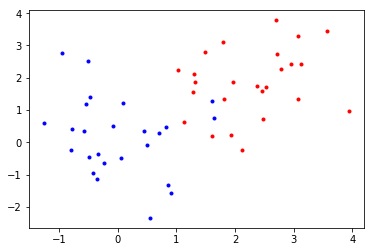

In [37]:
x1 = np.random.randn(25,2)
x2 = np.random.randn(25,2) + 2
plt.plot(x1[:,0], x1[:,1], '.b')
plt.hold(True)
plt.plot(x2[:,0], x2[:,1], '.r')

In [38]:
y1 = np.zeros((25,1), dtype=int)
y2 = np.ones((25,1), dtype=int)
X = np.vstack((x1,x2))
Y = np.vstack((y1,y2))
D = pd.DataFrame(np.hstack((X,Y)), columns=['x1', 'x2', 'y'])
D['y'] = D['y'].astype(int)
D = D.sample(frac=1).reset_index(drop=True)

In [39]:
groups = D[['x1','x2','y']].groupby('y')

from matplotlib.patches import Ellipse

def plot_point_cov(mean, nstd=2, ax=None, **kwargs):
    pos = mean
    cov = np.array([[1,0],[0,1]]) #np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
#     ellip.set_facecolor('none')

    ax.add_artist(ellip)
    return ellip


In [40]:
model = Model()

model.add(Dense(input_dim=2, output_dim=3))
model.add(Activation(func_type='sigmoid'))
model.add(Dense(output_dim=3))
model.add(Activation(func_type='sigmoid'))
model.add(Dense(output_dim=1))
model.add(Activation(func_type='sigmoid', bias=False))

model.compose(loss = Loss('squared_error'))
err = model.fit(D[['x1','x2']].as_matrix(), D['y'].as_matrix(), epoch=1000, alpha = 0.01)

Y_pred = model.predict(D[['x1','x2']].as_matrix())

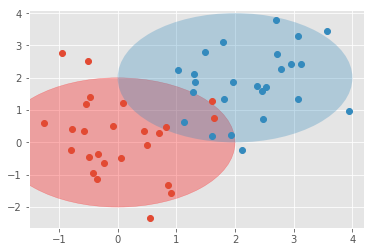

In [41]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.x1, group.x2, marker='.', linestyle='', ms=12, label=name)
    
    plot_point_cov(np.array([0,0]), nstd=2, alpha=0.3, color = 'r')
    plot_point_cov(np.array([2,2]), nstd=2, alpha=0.3)

In [42]:
# X - some data in 2dimensional np.array

h = 0.02
X_db = D[['x1','x2']].as_matrix()

x_min, x_max = X_db[:, 0].min() - 1, X_db[:, 0].max() + 1
y_min, y_max = X_db[:, 1].min() - 1, X_db[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# here "model" is your model's prediction (classification) function
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.around(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

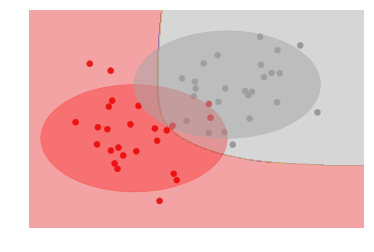

In [54]:
with plt.style.context('ggplot'):

    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.4)
    plt.axis('off')

    # Plot also the training points
    plt.scatter(X_db[:, 0], X_db[:, 1], c=D['y'].as_matrix(), cmap=plt.cm.Set1)
    plot_point_cov(np.array([0,0]), nstd=2, alpha=0.3, color = 'r')
    plot_point_cov(np.array([2,2]), nstd=2, alpha=0.5, color = '#a6a6a6')

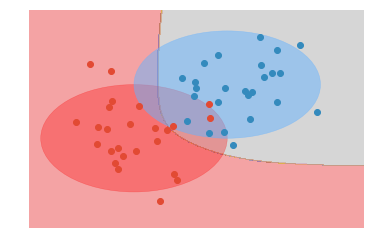

In [51]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.x1, group.x2, marker='.', linestyle='', ms=12, label=name)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.4)
    plt.axis('off')

    # Plot also the training points
#     plt.scatter(X_db[:, 0], X_db[:, 1], c=D['y'].as_matrix(), cmap=plt.cm.Set1)
    plot_point_cov(np.array([0,0]), nstd=2, alpha=0.3, color = 'r')
    plot_point_cov(np.array([2,2]), nstd=2, alpha=0.5, color = '#66b3ff')

